# Bin 3-5 (Guest Count)

Let's get a better understanding of the different `guest_count` bins.  
This time, the 3-5 guests bin:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_map = {
    "hockey"    : "../data/hockey_3_text_processed.csv",
    "valentine" : "../data/valentine_3_text_processed.csv",
    "silvester" : "../data/silvester_3_text_processed.csv"
}

In [3]:
df = {}
for table in data_map.keys():
    df[table] = pd.read_csv(data_map[table])

df = pd.concat([df[table] for table in data_map.keys()])

In [4]:
df.head()

,bar_id,order_id,order_time,order_time_closed,order_item_time,order_item_id,item_qty,sales_before_tax,sales_inc_tax,guest_count,...,first_to_second_order,avg_time_between_steps,sit_to_order,max_items_per_step,total_large_meals,total_small_meals,total_large_sharable_meals,total_small_sharable_meals,total_sales_before_tax,total_sales_inc_tax
0,1177,520008106,2019-04-16 12:01:00,2019-04-16 13:15:52,2019-04-16 12:13:26,52000810601,1.0,2.97,3.425081,1,...,0,13.00,13,2,1.0,1.0,1.0,0.0,19.84,22.88
1,1177,520008106,2019-04-16 12:01:00,2019-04-16 13:15:52,2019-04-16 12:13:26,52000810600,1.0,16.87,19.454919,1,...,0,13.00,13,2,1.0,1.0,1.0,0.0,19.84,22.88
2,1177,520008105,2019-04-16 12:01:00,2019-04-16 13:11:55,2019-04-16 12:18:25,52000810502,1.0,8.99,10.368399,1,...,4,8.50,13,1,2.0,0.0,1.0,0.0,26.61,30.69
3,1177,520008105,2019-04-16 12:01:00,2019-04-16 13:11:55,2019-04-16 12:13:26,52000810500,1.0,17.62,20.321601,1,...,4,8.50,13,1,2.0,0.0,1.0,0.0,26.61,30.69
4,1177,520253565,2019-04-16 19:35:00,2019-04-16 22:39:18,2019-04-16 20:56:13,52025356502,1.0,7.62,8.610000,0,...,40,32.25,1,1,0.0,0.0,0.0,0.0,30.48,34.44


Recall our features:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151862 entries, 0 to 445493
Data columns (total 50 columns):
bar_id                          1151862 non-null int64
order_id                        1151862 non-null int64
order_time                      1151862 non-null object
order_time_closed               1151862 non-null object
order_item_time                 1151862 non-null object
order_item_id                   1151862 non-null int64
item_qty                        1151862 non-null float64
sales_before_tax                1151862 non-null float64
sales_inc_tax                   1151862 non-null float64
guest_count                     1151862 non-null int64
title                           1151862 non-null object
category_id                     1151862 non-null float64
beer_brand_id                   1151862 non-null int64
beer_serving_type_id            1151862 non-null int64
beer_volume                     1151862 non-null float64
total_orders_category_id_1.0    1151862 non-null 

**Recall we care about 3-5 guest_count tables only**

In [6]:
old_len = len(df)
old_len

1151862

In [7]:
df = df[(df["guest_count"] >= 3) & (df["guest_count"] <= 5)]

In [8]:
len(df)

275891

In [9]:
print("We're left with {0:.2f}% of the original data.".format(100 * float(len(df)) / old_len))

We're left with 23.95% of the original data.


Create tables:

In [10]:
def shrink_orders_to_table(data):
    # use `min` wherever the feature is fixed for the entire table
    # use `max` for booleans (we take the value of True whenever there exists at least 1 truthy order_item of the feature)
    
    data = data.groupby("order_id", as_index=False).agg({
        "order_time": "min",
        "order_time_closed": "min",
        "order_hour": "min",
        "order_minute": "min",
        "order_close_hour": "min",
        "order_close_minute": "min",
        "period_of_day": "min",
        "order_day_of_week": "min",
        "is_weekend": "min",
        
        "item_qty": "sum",
        "beer_volume": "sum",
        "guest_count": "min",
        
        "total_orders_category_id_1.0": "min",
        "total_orders_category_id_2.0": "min",
        "total_orders_category_id_3.0": "min",
        "total_orders_category_id_4.0": "min",
        "total_orders_category_id_5.0": "min",
        "total_orders_category_id_6.0": "min",
        "total_orders": "min",
        "total_large_meals":"min",
        "total_small_meals":"min",
        "total_large_sharable_meals":"min",
        "total_small_sharable_meals":"min",
        
        "sharable": "max",
        "kids_meal": "max",
        "birthday": "max",
        
        "dwell_time": "min",
        "meal_flow_last_to_close": "min",
        "total_flow_steps": "min",
        "total_meal_steps":"min",
        "avg_time_between_steps":"min",
        "sit_to_order":"min",
        "max_items_per_step":"min",
        
        "total_sales_before_tax": "min",
        "total_sales_inc_tax": "min"
    })
    
    data.set_index("order_id", inplace=True)
    return data

In [11]:
df = shrink_orders_to_table(df)

In [12]:
df.head()

,order_time,order_time_closed,order_hour,order_minute,order_close_hour,order_close_minute,period_of_day,order_day_of_week,is_weekend,item_qty,...,birthday,dwell_time,meal_flow_last_to_close,total_flow_steps,total_meal_steps,avg_time_between_steps,sit_to_order,max_items_per_step,total_sales_before_tax,total_sales_inc_tax
order_id,,,,,,,,,,,,,,,,,,,,,
358742274,2018-12-23 00:20:00,2018-12-23 00:40:12,0,20,0,40,night,Sunday,True,12.0,...,0,0.336667,20,363,4,343.25,1,4,101.35,114.52
358742546,2018-12-23 00:00:00,2018-12-23 00:57:43,0,0,0,57,night,Sunday,True,5.0,...,0,0.961944,5,13,2,16.50,1,3,50.42,56.97
358742547,2018-12-23 00:01:00,2018-12-23 00:50:36,0,1,0,50,night,Sunday,True,6.0,...,0,0.826667,3,11,2,16.50,1,3,34.68,39.19
358742549,2018-12-23 00:35:00,2018-12-23 01:02:09,0,35,1,2,night,Sunday,True,4.0,...,0,0.452500,6,6,1,1.00,1,4,44.78,50.60
358743095,2018-12-23 00:02:00,2018-12-23 00:41:43,0,2,0,41,night,Sunday,True,13.0,...,0,0.661944,1,9,3,11.00,1,8,53.12,60.03


Our table features are:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32742 entries, 358742274 to 526414752
Data columns (total 35 columns):
order_time                      32742 non-null object
order_time_closed               32742 non-null object
order_hour                      32742 non-null int64
order_minute                    32742 non-null int64
order_close_hour                32742 non-null int64
order_close_minute              32742 non-null int64
period_of_day                   32742 non-null object
order_day_of_week               32742 non-null object
is_weekend                      32742 non-null bool
item_qty                        32742 non-null float64
beer_volume                     32742 non-null float64
guest_count                     32742 non-null int64
total_orders_category_id_1.0    32742 non-null float64
total_orders_category_id_2.0    32742 non-null float64
total_orders_category_id_3.0    32742 non-null float64
total_orders_category_id_4.0    32742 non-null float64
total_orders_cat

Total of 35 features (not counting the index - `order_id`)

### Exploration

Let's split these to categories:

#### 1. Times (6 + 3 + 1 = 10)

- `order_time`
- `order_time_closed`
- `order_hour`
- `order_minute`
- `order_close_hour`
- `order_close_minute`


- `period_of_day`
- `order_day_of_week`
- `is_weekend`


- `dwell_time`

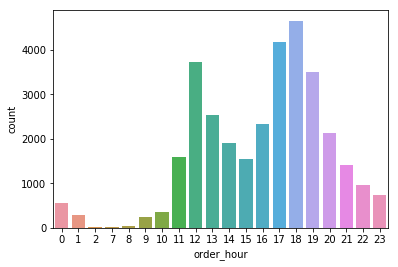

In [14]:
sns.countplot(x='order_hour', data=df)

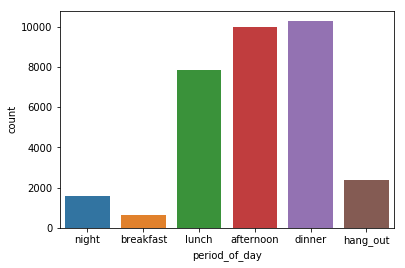

In [15]:
sns.countplot(x='period_of_day', data=df)

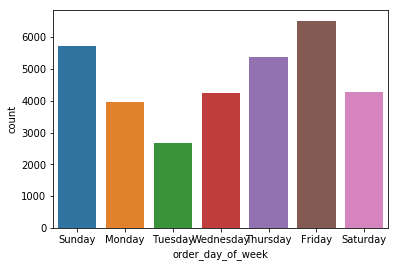

In [16]:
sns.countplot(x='order_day_of_week', data=df)

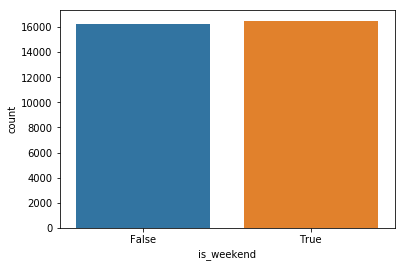

In [17]:
sns.countplot(x='is_weekend', data=df)

C:\Users\Ronni\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 5)

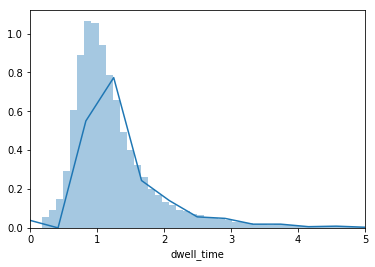

In [18]:
sns.distplot(df['dwell_time'], bins=500)
plt.xlim(0, 5)

#### 2. Counts (3 + 11 + 2 = 16)

- `item_qty`
- `beer_volume`
- `guest_count`


- `total_orders_category_id_1.0`
- `total_orders_category_id_2.0`
- `total_orders_category_id_3.0`
- `total_orders_category_id_4.0`
- `total_orders_category_id_5.0`
- `total_orders_category_id_6.0`
- `total_orders`
- `total_large_meals`
- `total_small_meals`
- `total_large_sharable_meals`
- `total_small_sharable_meals`


- `total_sales_before_tax`
- `total_sales_inc_tax`

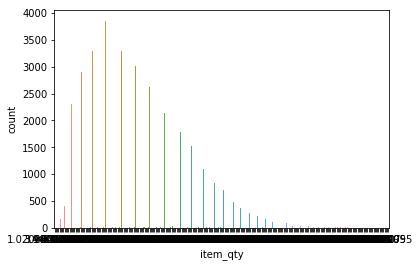

In [19]:
sns.countplot(x='item_qty', data=df)

In [20]:
df.item_qty.value_counts(normalize=True)

6.00      0.117708
7.00      0.100788
5.00      0.100513
8.00      0.091809
4.00      0.088724
9.00      0.080233
3.00      0.070582
10.00     0.065482
11.00     0.054639
12.00     0.046424
13.00     0.033627
14.00     0.025533
15.00     0.021776
16.00     0.014507
2.00      0.012492
17.00     0.011514
18.00     0.008430
19.00     0.006628
20.00     0.005284
1.00      0.005009
21.00     0.003299
23.00     0.002901
22.00     0.002199
25.00     0.001283
24.00     0.001191
26.00     0.000977
10.67     0.000794
12.67     0.000764
13.67     0.000672
11.67     0.000641
            ...   
32.02     0.000031
18.68     0.000031
33.80     0.000031
265.05    0.000031
30.51     0.000031
54.34     0.000031
18.33     0.000031
25.03     0.000031
26.76     0.000031
9.66      0.000031
63.00     0.000031
11.00     0.000031
30.34     0.000031
19.50     0.000031
49.00     0.000031
7.17      0.000031
53.00     0.000031
25.01     0.000031
13.66     0.000031
20.34     0.000031
25.25     0.000031
17.99     0.

> 66% of the tables order 3-9 items

(0, 3)

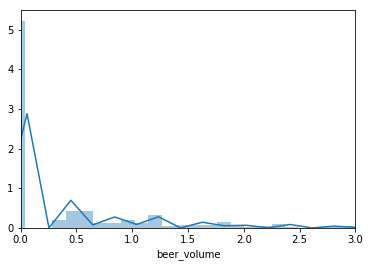

In [21]:
sns.distplot(df['beer_volume'], bins=200)
plt.xlim(0, 3)

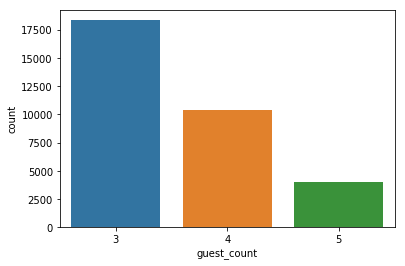

In [22]:
sns.countplot(x='guest_count', data=df)

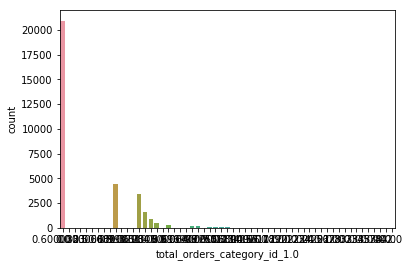

In [23]:
sns.countplot(x='total_orders_category_id_1.0', data=df)

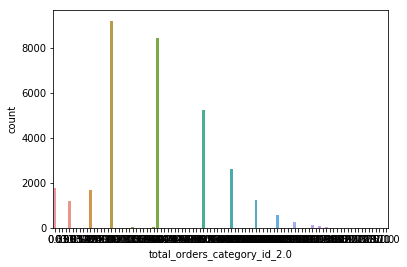

In [24]:
sns.countplot(x='total_orders_category_id_2.0', data=df)

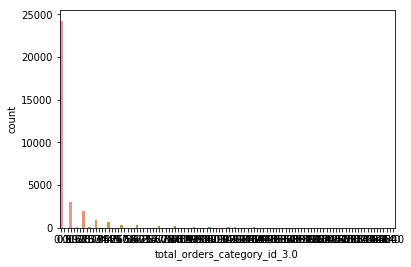

In [25]:
sns.countplot(x='total_orders_category_id_3.0', data=df)

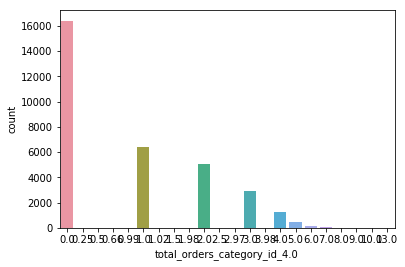

In [26]:
sns.countplot(x='total_orders_category_id_4.0', data=df)

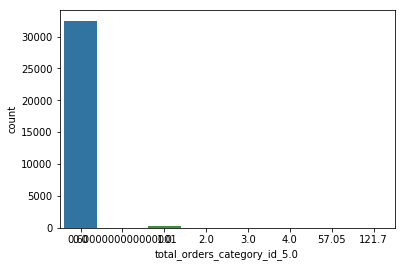

In [27]:
sns.countplot(x='total_orders_category_id_5.0', data=df)

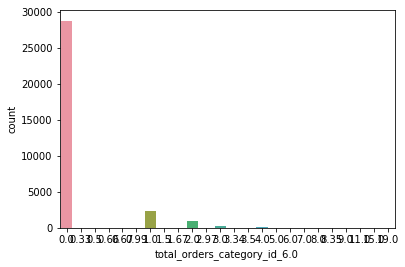

In [28]:
sns.countplot(x='total_orders_category_id_6.0', data=df)

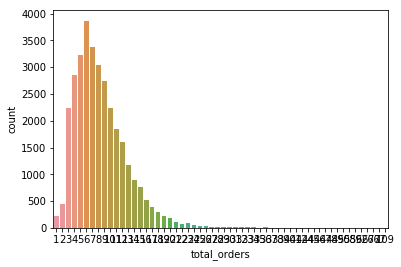

In [29]:
sns.countplot(x='total_orders', data=df)

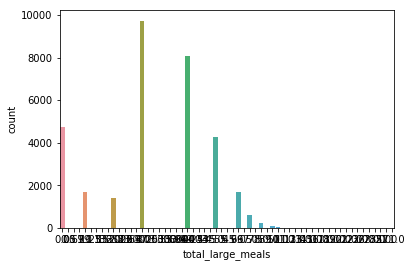

In [30]:
sns.countplot(x='total_large_meals', data=df)

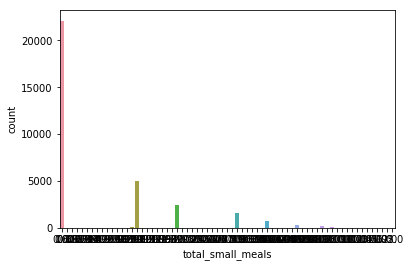

In [31]:
sns.countplot(x='total_small_meals', data=df)

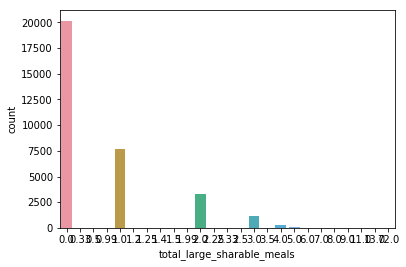

In [32]:
sns.countplot(x='total_large_sharable_meals', data=df)

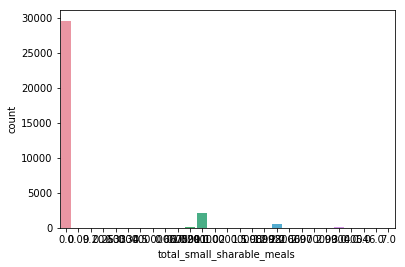

In [33]:
sns.countplot(x='total_small_sharable_meals', data=df)

(0, 1000)

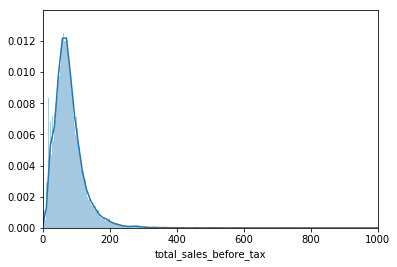

In [34]:
sns.distplot(df['total_sales_before_tax'], bins=1000)
plt.xlim(0, 1000)

(0, 1000)

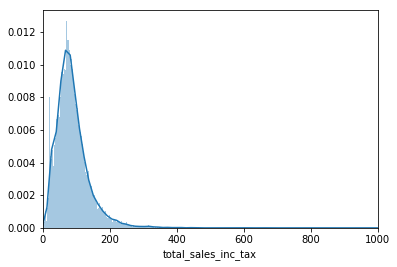

In [35]:
sns.distplot(df['total_sales_inc_tax'], bins=1000)
plt.xlim(0, 1000)

#### 3. General (3)

- `sharable`
- `kids_meal`
- `birthday`

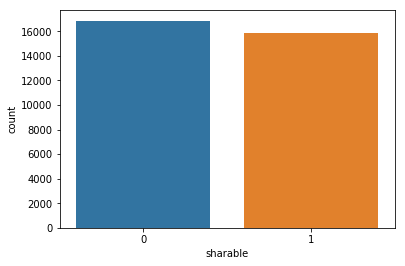

In [36]:
sns.countplot(x='sharable', data=df)

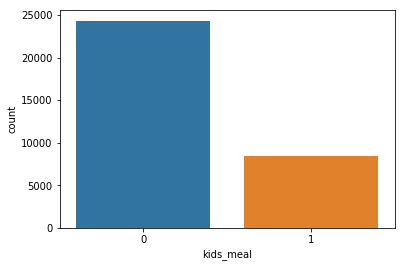

In [37]:
sns.countplot(x='kids_meal', data=df)

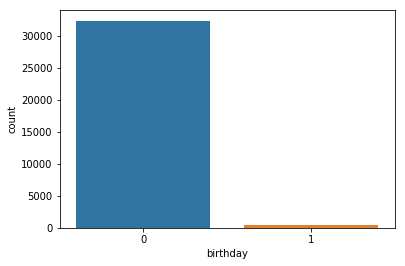

In [38]:
sns.countplot(x='birthday', data=df)

#### 4. Not Relevant (6)

- `meal_flow_last_to_close`
- `total_flow_steps`
- `total_meal_steps`
- `avg_time_between_steps`
- `sit_to_order`
- `max_items_per_step`